In [1]:
import pandas as pd
import numpy as np

In [8]:
import os
os.listdir('../input')

['sample_submission.csv', 'test.csv', 'train.csv']

In [178]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# data info

In [10]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (15208, 21)
test shape :  (6555, 20)


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Data columns (total 21 columns):
id               15208 non-null int64
date             15208 non-null object
price            15208 non-null float64
bedrooms         15208 non-null int64
bathrooms        15208 non-null float64
sqft_living      15208 non-null int64
sqft_lot         15208 non-null int64
floors           15208 non-null float64
waterfront       15208 non-null int64
view             15208 non-null int64
condition        15208 non-null int64
grade            15208 non-null int64
sqft_above       15208 non-null int64
sqft_basement    15208 non-null int64
yr_built         15208 non-null int64
yr_renovated     15208 non-null int64
zipcode          15208 non-null int64
lat              15208 non-null float64
long             15208 non-null float64
sqft_living15    15208 non-null int64
sqft_lot15       15208 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
id               6555 non-null int64
date             6555 non-null object
bedrooms         6555 non-null int64
bathrooms        6555 non-null float64
sqft_living      6555 non-null int64
sqft_lot         6555 non-null int64
floors           6555 non-null float64
waterfront       6555 non-null int64
view             6555 non-null int64
condition        6555 non-null int64
grade            6555 non-null int64
sqft_above       6555 non-null int64
sqft_basement    6555 non-null int64
yr_built         6555 non-null int64
yr_renovated     6555 non-null int64
zipcode          6555 non-null int64
lat              6555 non-null float64
long             6555 non-null float64
sqft_living15    6555 non-null int64
sqft_lot15       6555 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1.0+ MB


In [41]:
train.iloc[:,1:].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.520800e+04,15208.000000,15208.000000,15208.000000,1.520800e+04,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000,15208.000000
mean,5.396375e+05,3.371581,2.115761,2079.250066,1.510784e+04,1.491616,0.007102,0.234153,3.414716,7.652157,1785.225539,294.024527,1970.895910,84.138019,98078.417346,47.560386,-122.214892,1985.722712,12805.336139
std,3.673948e+05,0.944338,0.771572,918.677235,4.176538e+04,0.539502,0.083974,0.764814,0.653653,1.176307,827.790976,444.464445,29.398459,401.121371,53.500779,0.138838,0.140058,686.362821,27901.058780
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.200000e+05,3.000000,1.500000,1429.250000,5.026750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571850,-122.232000,1840.000000,7619.500000
75%,6.435000e+05,4.000000,2.500000,2550.000000,1.065125e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,580.000000,1997.000000,0.000000,98118.000000,47.678700,-122.126000,2360.000000,10077.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
test.iloc[:,1:].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6555.000000,6555.000000,6555.000000,6.555000e+03,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000,6555.000000
mean,3.351640,2.093516,2064.500992,1.490303e+04,1.489016,0.008848,0.232342,3.414493,7.639969,1778.594813,285.906178,1970.349047,84.316095,98079.464226,47.561815,-122.215813,1980.380168,12291.057818
std,0.921588,0.776235,913.819665,4.144576e+04,0.539656,0.093655,0.766552,0.658600,1.173162,833.745769,437.225295,29.570353,401.445758,53.437620,0.137401,0.140111,699.981030,25520.455731
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,750.000000
25%,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.475100,-122.331000,1460.000000,5027.000000
50%,3.000000,2.250000,1880.000000,7.587000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98072.000000,47.572300,-122.236000,1820.000000,7591.000000
75%,4.000000,2.500000,2550.000000,1.063850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2180.000000,550.000000,1996.000000,0.000000,98118.000000,47.677500,-122.125000,2360.000000,10000.000000
max,9.000000,6.500000,7850.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


# NA 
- 하나도 없음

In [16]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns

## Key Columns -id

In [63]:
print('train의 데이터 개수와 id unique 값 동일') if len(train.id.unique()) == train.shape[0] else print('다르다')
print('test의 데이터 개수와 id unique 값 동일') if len(test.id.unique()) == test.shape[0] else print('다르다')

train의 데이터 개수와 id unique 값 동일
test의 데이터 개수와 id unique 값 동일


In [69]:
print('train, test id 겹치는 id가 없다.') if len(set(train.id).intersection(set(test.id))) == 0 else print('겹친다')

train, test id 겹치는 id가 없다.


In [85]:
print('train id {}부터 {}까지 {}개'.format(train.id[0], train.id.iloc[-1], len(train.id)))
print('test id {}부터 {}까지 {}개'.format(test.id[0], test.id.iloc[-1], len(test.id)))

train id 0부터 15207까지 15208개
test id 15208부터 21762까지 6555개


## target column - price

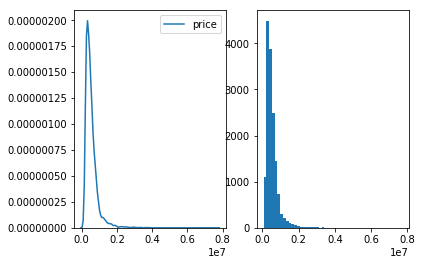

In [87]:
plt.subplot(1,2,1)
sns.kdeplot(train['price'])

plt.subplot(1,2,2)
plt.hist(train['price'], bins=50)
plt.show()

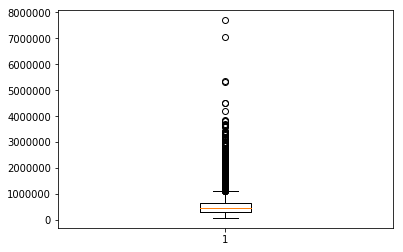

In [31]:
plt.boxplot(train['price'])
plt.show()

- target에 log 취하기

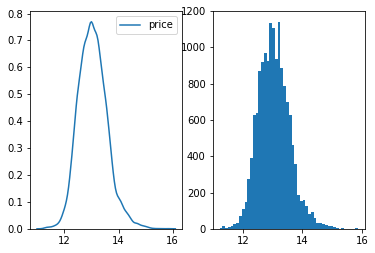

In [89]:
plt.subplot(1,2,1)
sns.kdeplot(np.log(train['price']))

plt.subplot(1,2,2)
plt.hist(np.log(train['price']), bins=50)
plt.show()

## features

In [189]:
#df : train과 test cocnat
df = pd.concat([train.drop('price', axis = 1),test])

### date

In [106]:
#T000000 아닌 값이 없다.
for st in df.date :
    if st[8:] != 'T000000' :
        print(st)

In [185]:
#year
train['year'] = train['date'].map(lambda x : x[:4]).astype(int)
test['year'] = test['date'].map(lambda x : x[:4]).astype(int)
#month
train['month'] = train['date'].map(lambda x : x[4:6]).astype(int)
test['month'] = test['date'].map(lambda x : x[4:6]).astype(int)
#day
train['day'] = train['date'].map(lambda x : x[6:8]).astype(int)
test['day'] = test['date'].map(lambda x : x[6:8]).astype(int)

#date
train['date'] = train['date'].map(lambda x : x[:8])
test['date'] = test['date'].map(lambda x : x[:8])

train['date'] = pd.to_datetime(train['date'], format="%Y%m%d")
test['date'] = pd.to_datetime(test['date'], format="%Y%m%d")

In [188]:
#train.to_csv('../input/train.csv', index = False)
#test.to_csv('../input/test.csv', index = False)

In [209]:
features = train.drop(['id','price'], axis = 1).columns
len(features)

22

In [191]:
print('train 날짜 {}부터 {}까지'.format(train.date.min(), train.date.max()))
print('test 날짜 {}부터 {}까지'.format(test.date.min(), test.date.max()))
print('전체 날짜 {}부터 {}까지'.format(df.date.min(), df.date.max()))

train 날짜 2014-05-02 00:00:00부터 2015-05-27 00:00:00까지
test 날짜 2014-05-02 00:00:00부터 2015-05-24 00:00:00까지
전체 날짜 2014-05-02 00:00:00부터 2015-05-27 00:00:00까지


### features histogram

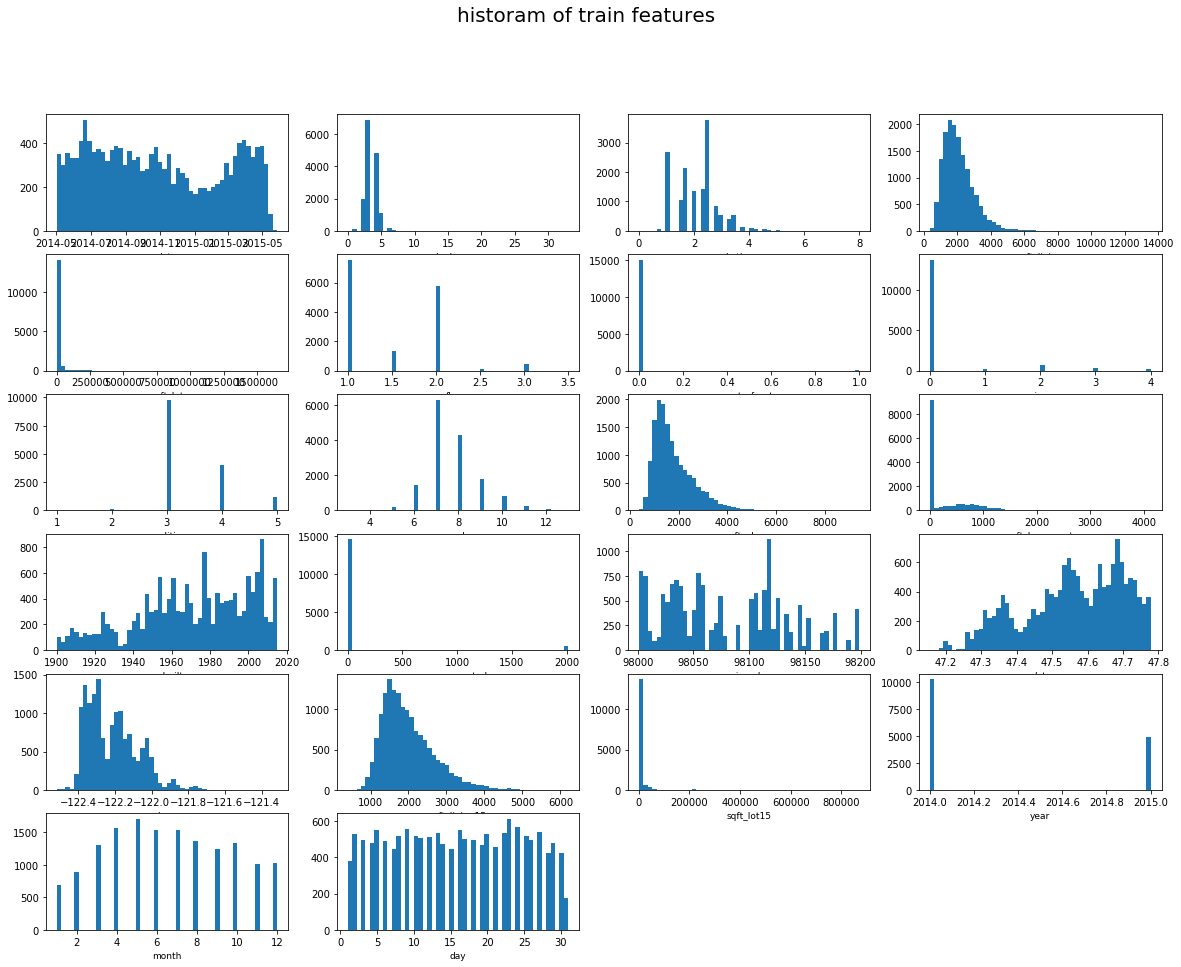

In [221]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(train[features[i]], bins = 50)
    
    plt.xlabel(features[i],fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)

plt.suptitle('historam of train features', size = 20)
plt.show()

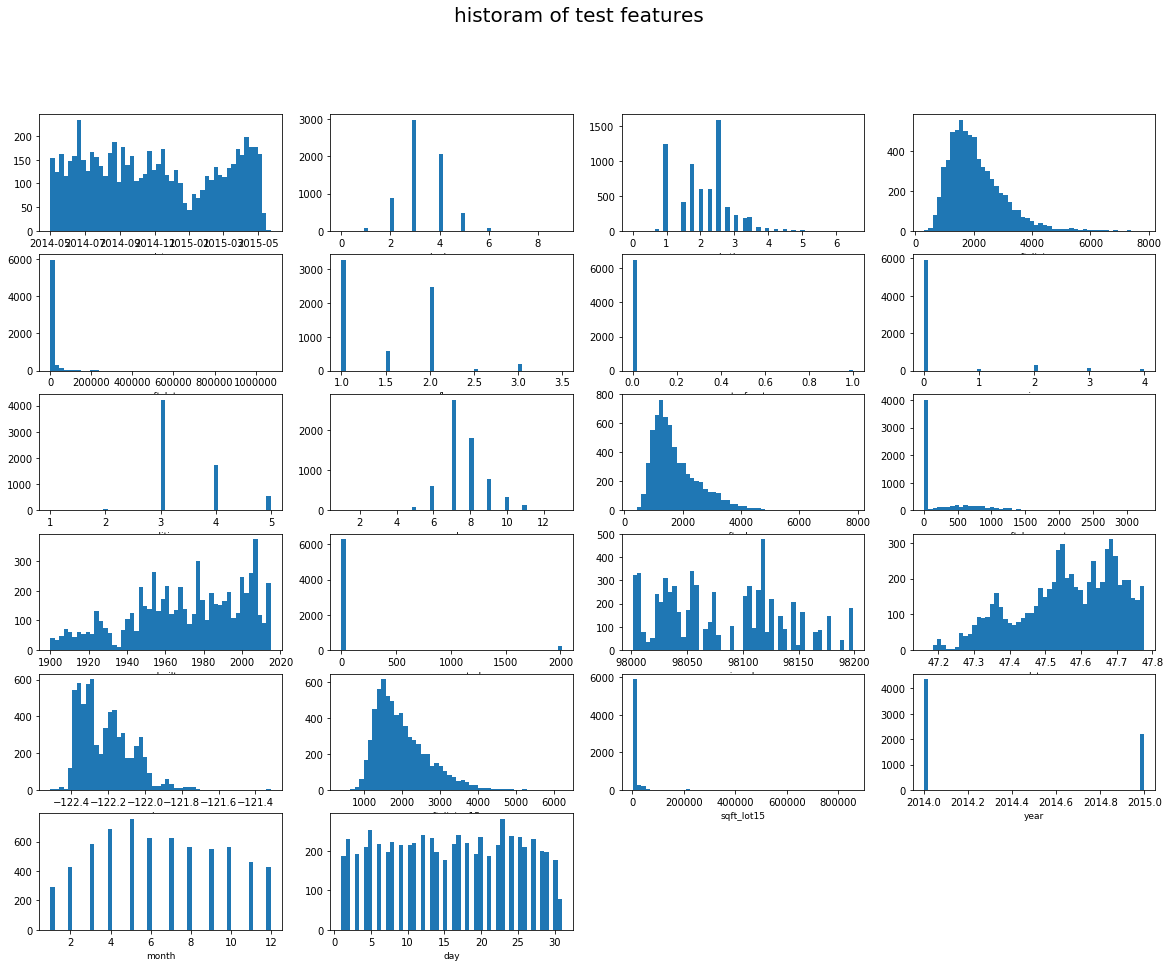

In [222]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(test[features[i]], bins = 50)
    
    plt.xlabel(features[i],fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)

plt.suptitle('historam of test features', size = 20)
plt.show()

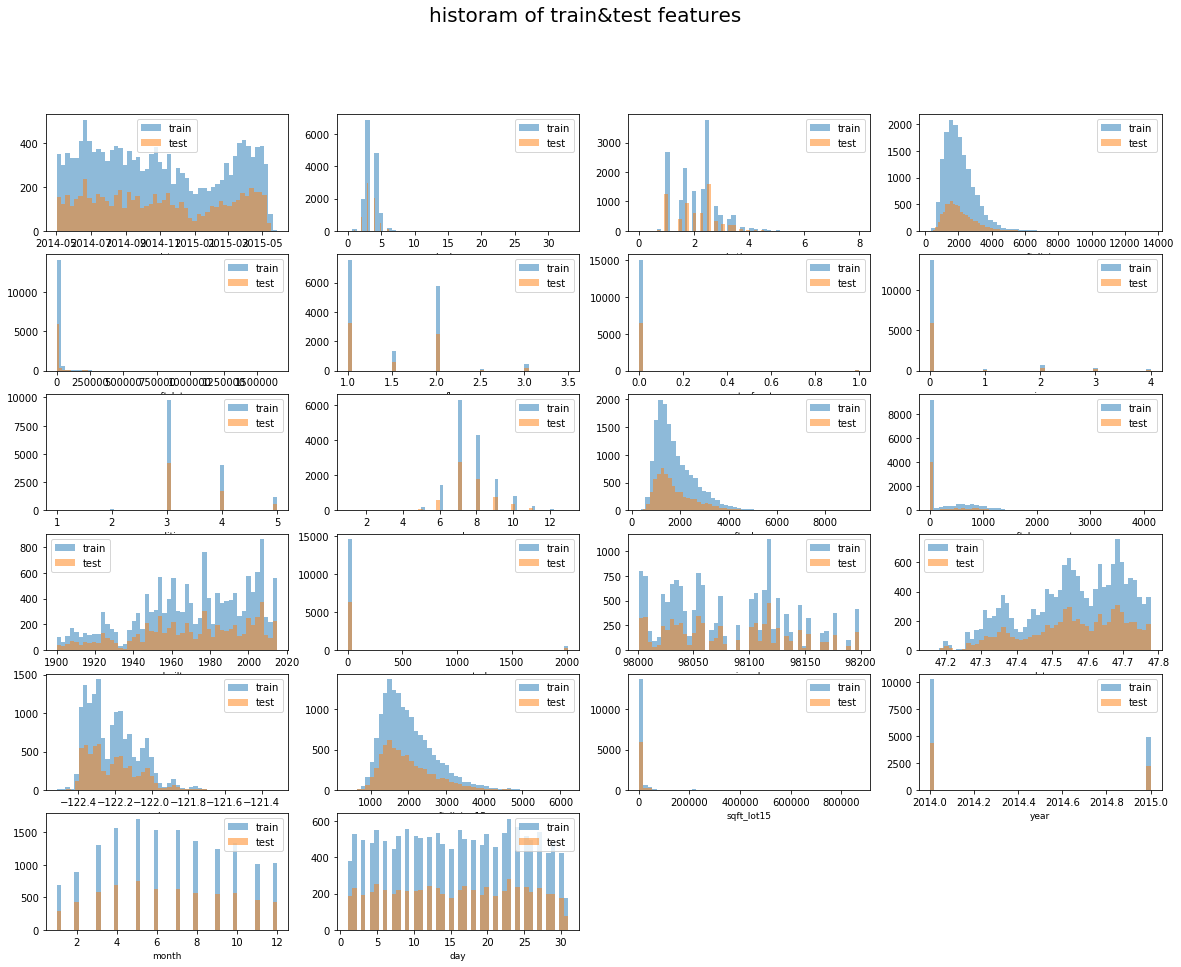

In [225]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(train[features[i]], bins = 50, label = 'train', alpha = 0.5)
    plt.hist(test[features[i]], bins = 50, label = 'test', alpha = 0.5)
    plt.xlabel(features[i],fontsize=9)
    
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)
    plt.legend()
plt.suptitle('historam of train&test features', size = 20)
plt.show()

train, test가 비슷한 분포를 보이는 것을 알 수 있다.